<a href="https://colab.research.google.com/github/Aryanaut/detectingDigit/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist 
(x_train, y_train),(x_test, y_test) = mnist.load_data() 

## Training the model

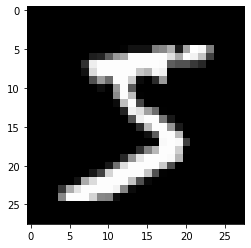

In [4]:
plt.imshow(x_train[0], cmap="gray") 
plt.show() 

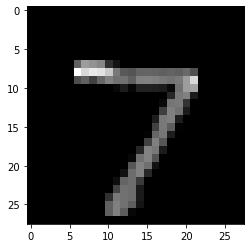

In [5]:
xTrain = tf.keras.utils.normalize(x_train, axis=1) # normalizing training data
xTest = tf.keras.utils.normalize(x_test, axis=1) # normalizing testing data
plt.imshow(xTest[0], cmap="gray")
plt.show()

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # CNN Layer 1
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # CNN Layer 2
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # CNN Final Layer

In [7]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) # model compiled

In [8]:
model.fit(x=xTrain, y=y_train, epochs=5) # model fitted 

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2601 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1062 - accuracy: 0.9668
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0718 - accuracy: 0.9772
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0520 - accuracy: 0.9830
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0405 - accuracy: 0.9871


In [9]:
loss, accuracy = model.evaluate(x=xTest, y=y_test)
print("\nTest accuracy: ", round(accuracy, 3)) # prints the model's accuracy

313/313 [==============================] - 0s 1ms/step - loss: 0.0953 - accuracy: 0.9729

Test accuracy:  0.973


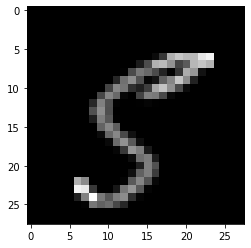

In [10]:
plt.imshow(xTest[211], cmap='gray')
plt.show()

## Testing the model

In [11]:
prediction = model.predict([xTest])

Consider rewriting this model with the Functional API.


In [12]:
np.argmax(prediction[211])

5

## Running the model on live camera feed with OpenCV

In [15]:
def nothing(x):
    pass

In [19]:
cv2.namedWindow('frame')
cv2.createTrackbar('r', 'frame', 0, 255, nothing)
cv2.setTrackbarPos('r', 'frame', 23)
cap = cv2.VideoCapture(0)
currentVal = 0
modelOut = 0
inData = np.empty((5, 28, 28))

while True:
    if currentVal == 4:
        prediction = model.predict([inData])
        modelOut = np.argmax(prediction[currentVal-2])
        
        inData = np.empty((5, 28, 28))
        currentVal = 0
        
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    threshold = int(cv2.getTrackbarPos('r', 'frame'))
    _, thr = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY_INV)
    h = 200
    w = 200
    y = int((frame.shape[0]/2)-h/2)
    x = int((frame.shape[1]/2)-w/2)

    cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
    area = thr[y:y+w, x:x+w]
    area = cv2.resize(area, (28, 28))
    areaFlattened = tf.keras.utils.normalize(area, axis=1)
    # print(areaFlattened.shape)
    inData[currentVal] = areaFlattened
    cv2.putText(frame, str(modelOut), (30, 30), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 1, cv2.LINE_AA, False)
    
    cv2.imshow('thr', thr)
    cv2.imshow('frame', frame)
    currentVal += 1
    if cv2.waitKey(20) & 0xff == ord('q'):
        cv2.imwrite('area.png', area)
        break
        
        
cap.release()
cv2.destroyAllWindows()